<a href="https://colab.research.google.com/github/Adriana-Melo29/DataXperience/blob/main/Simulador_Excesos_tiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""ETAPA 1: CREACIÓN DE BASE DE DATOS GENERAL"""

"""Autoriazacion acceso Colab a google Drive"""
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
"""Cargar bases de datos"""
df_base_Inv = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Base EAN Inventarios.xlsx')
df_base_Atri = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Base EAN Atributos.xlsx')
df_base_Parm = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Base EAN Parametros.xlsx')

"""Visualización inicial de las Bases de datos DataFrame"""
display(df_base_Inv.head(2))
display(df_base_Atri.head(2))
display(df_base_Parm.head(2))

"""Correccion titulos de la base de datos"""
df_base_Inv = df_base_Inv.rename(columns={'Transito': 'Almacen'})

"""Validacion de formatos de las bases de datos"""
display(df_base_Inv.dtypes)
display(df_base_Parm.dtypes)
display(df_base_Atri.dtypes)

"""Cambio de formato para material de numero a Texto"""
df_base_Inv['Material'] = df_base_Inv['Material'].astype(str)
df_base_Atri['CODIGO SAP'] = df_base_Atri['CODIGO SAP'].astype(str)
df_base_Parm['Material'] = df_base_Parm['Material'].astype(str)

"""Codigos o llaves para el cruce (Centro + Material)"""
df_base_Inv["Llave"] = df_base_Inv["Centro"].astype(str) + "_" + df_base_Inv["Material"].astype(str)
df_base_Parm["Llave"] = df_base_Parm["Centro"].astype(str) + "_" + df_base_Parm["Material"].astype(str)

"""Limpieza de datos inventarios (Titulos y filtros)"""
"""Limpiar titulos"""
df_base_Inv = df_base_Inv.drop(columns=['Trans./Trasl.','ALTO','ANCHO','PROFUNDO'], axis=1)
"""Filtrar texto inventario disponible"""
df_base_Inv = df_base_Inv[df_base_Inv["Almacen"].isin(["Disponible"])]
display(df_base_Inv.head(2))

"""Cruce de informacion entre bases de datos"""
df_base_Inv_Parm = pd.merge(df_base_Inv, df_base_Parm, on=["Llave"], how="left")
"""Traer informacion de la base de datos Atributos (Nombre Llaves diferentes)"""
df_base_Inv_Parm_Atri = pd.merge(df_base_Inv_Parm, df_base_Atri, left_on="Material_x",right_on="CODIGO SAP", how="left")
display(df_base_Inv_Parm_Atri.head(2))

"""Limpieza de datos (Titulos y filtros)"""
"""Limpiar titulos"""
df_base_Inv_Parm_Atri= df_base_Inv_Parm_Atri.drop(columns=['Llave','CentroMaterial','Material_y','Centro_y','Stat.mat.específ.ce.','Indicador ABC','Aprovis.especial','Punto de pedido','DEPARTAMENTO','CATEGORIA','TIPO PAGO','ALTO','ANCHO','PROFUNDO','CODIGO SAP'], axis=1)

"""Duplicar base general"""         """Aqui tuve error, por que pense que renombrando la base final, crearia copia de ambas, sin embargo quedaron vinvuladas"""
df_base_Necesidad= df_base_Inv_Parm_Atri.copy()
df_base_Excesos= df_base_Inv_Parm_Atri.copy()
display(df_base_Necesidad.head(2))
display(df_base_Excesos.head(2))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Material,Centro,Transito,Libre utilización,Trans./Trasl.,ALTO,ANCHO,PROFUNDO
0,80450077,A301,Disponible,15.0,0.0,"23,00","7,60","2,40"
1,80450077,B402,Transito,0.0,5.0,"23,00","7,60","2,40"


,CODIGO SAP,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,DEPARTAMENTO,MUNDO,CATEGORIA,TIPO PAGO,ALTO,ANCHO,PROFUNDO
0,80467294,APOSITO NEXCARE TEGADERM 10X12CM X5,3M COLOMBIA S.A.,20433,PROD MEDICOS ESPECIALIZADOS,SOLUCIONES DE SALUD,ASEPSIA Y CUIDADO HERIDAS,FIRME,"21,10","14,10","3,10"
1,80459832,ZOLOF TAB.50MG X10,3M COLOMBIA S.A.,59594,FARMACEUTICOS,ETICOS,N_SISTEMA NERVIOSO,FIRME,"5,00","3,00","10,00"


,CentroMaterial,Material,Centro,Stat.mat.específ.ce.,Indicador ABC,Aprovis.especial,Punto de pedido,Stock máximo,Rotacion Mes
0,A30180450077,80450077,A301,NaN,A,ZA,15,20,8
1,B40280450077,80450077,B402,NaN,A,ZA,8,12,10


,0
Material,int64
Centro,object
Almacen,object
Libre utilización,float64
Trans./Trasl.,float64
ALTO,object
ANCHO,object
PROFUNDO,object


,0
CentroMaterial,object
Material,int64
Centro,object
Stat.mat.específ.ce.,object
Indicador ABC,object
Aprovis.especial,object
Punto de pedido,int64
Stock máximo,int64
Rotacion Mes,int64


,0
CODIGO SAP,int64
NOMBRE,object
NOMBRE PROVEEDOR,object
COSTO UND,int64
DEPARTAMENTO,object
MUNDO,object
CATEGORIA,object
TIPO PAGO,object
ALTO,object
ANCHO,object


,Material,Centro,Almacen,Libre utilización,Llave
0,80450077,A301,Disponible,15.0,A301_80450077
2,80450077,B402,Disponible,6.0,B402_80450077


,Material_x,Centro_x,Almacen,Libre utilización,Llave,CentroMaterial,Material_y,Centro_y,Stat.mat.específ.ce.,Indicador ABC,...,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,DEPARTAMENTO,MUNDO,CATEGORIA,TIPO PAGO,ALTO,ANCHO,PROFUNDO
0,80450077,A301,Disponible,15.0,A301_80450077,A30180450077,80450077,A301,NaN,A,...,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,NO FARMACEUTICOS,CUIDADO PERSONAL,CUIDADO ORAL,FIRME,"23,00","7,60","2,40"
1,80450077,B402,Disponible,6.0,B402_80450077,B40280450077,80450077,B402,NaN,A,...,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,NO FARMACEUTICOS,CUIDADO PERSONAL,CUIDADO ORAL,FIRME,"23,00","7,60","2,40"


,Material_x,Centro_x,Almacen,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO
0,80450077,A301,Disponible,15.0,20,8,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,CUIDADO PERSONAL
1,80450077,B402,Disponible,6.0,12,10,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,CUIDADO PERSONAL


,Material_x,Centro_x,Almacen,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO
0,80450077,A301,Disponible,15.0,20,8,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,CUIDADO PERSONAL
1,80450077,B402,Disponible,6.0,12,10,CLLO.DEN.COLGATE SLIM SOFT X2,LIFE CO S.A.S.,12980,CUIDADO PERSONAL


In [ ]:
"""ETAPA 2: CÁLCULOS DE NECESIDADES Y EXCESOS DE INVENTARIO."""
import numpy as np
"""Calculo para la Necesidad de inventario"""
df_base_Necesidad["Necesidad"] = (df_base_Necesidad["Stock máximo"] - df_base_Necesidad["Libre utilización"]).clip(lower=0)
df_base_Necesidad["Costo Necesidad"] = (df_base_Necesidad["Necesidad"] * df_base_Necesidad["COSTO UND "]).clip(lower=0)
df_base_Necesidad_Consol= df_base_Necesidad.copy()
"""Agrupar la necesidad por material"""
df_base_Necesidad_Consol= df_base_Necesidad_Consol.groupby("Material_x", as_index=False).sum()
"""Limpiar titulos"""
df_base_Necesidad_Consol= df_base_Necesidad_Consol.drop(columns=['Centro_x','Almacen','Libre utilización','Stock máximo','Rotacion Mes','NOMBRE','NOMBRE PROVEEDOR','COSTO UND ','MUNDO','Costo Necesidad'], axis=1)
"""Filtrar necesidad mayor que cero"""
df_base_Necesidad_Consol = df_base_Necesidad_Consol[df_base_Necesidad["Necesidad"]> 0]
display(df_base_Necesidad_Consol.head(2))

"""Calculo para los Excesos de inventario"""
df_base_Excesos["Excesos"] = (df_base_Excesos["Libre utilización"] - df_base_Excesos["Stock máximo"]).clip(lower=0)
"""Filtrar Excesos mayor que cero"""
df_base_Excesos = df_base_Excesos[df_base_Excesos["Excesos"]> 0]
"""Dias de inventario de los Excesos (redondeo a un decimal y condicional para productos sin rotacion)"""
df_base_Excesos["Dias Inv Excesos"] = np.where(df_base_Excesos["Rotacion Mes"] <= 0, 999,((df_base_Excesos["Excesos"] * 30) / df_base_Excesos["Rotacion Mes"]).round(1))


display(df_base_Excesos.head(2))
display(df_base_Excesos.describe())


/tmp/ipython-input-862521452.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_Necesidad_Consol = df_base_Necesidad_Consol[df_base_Necesidad["Necesidad"]> 0]


,Material_x,Necesidad
0,80450077,19.0
1,80450084,6.0


,Material_x,Centro_x,Almacen,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO,Excesos,Dias Inv Excesos
34,80450104,M301,Disponible,11.0,9,9,CRE.DEN.COLGATE TOTAL CLEANMINT X75G,LABORATORIOS MINERALIN S. A. S,5233,CUIDADO PERSONAL,2.0,6.7
38,80450106,M301,Disponible,8.0,6,1,CRE.DEN.COLGATE TOTAL12 CLEAN MINT X195G,LABORATORIOS NATURAL FRESHLY SAS,12884,CUIDADO PERSONAL,2.0,60.0


,Libre utilización,Stock máximo,Rotacion Mes,COSTO UND,Excesos,Dias Inv Excesos
count,8492.000000,8492.000000,8492.000000,8.492000e+03,8492.000000,8492.000000
mean,10.293028,5.272138,4.976095,3.614949e+04,5.020890,138.132595
std,41.938298,26.336435,3.182328,1.089080e+05,26.074179,558.281895
min,1.000000,0.000000,0.000000,1.050000e+02,0.002000,0.000000
25%,3.000000,2.000000,2.000000,1.041175e+04,1.000000,6.000000
50%,5.000000,3.000000,5.000000,2.212100e+04,2.000000,15.000000
75%,9.000000,4.000000,8.000000,4.086600e+04,4.000000,45.000000
max,2364.000000,2200.000000,10.000000,8.332500e+06,1380.000000,41400.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
"""ETAPA 3: DEFINICIÓN DE CRITERIOS Y PARÁMETROS"""

"""Criterio 1: EXCESO REUBICABLE"""
df_base_Excesos_C1= df_base_Excesos.copy()
df_base_Excesos_C1 = pd.merge(df_base_Excesos_C1, df_base_Necesidad_Consol, on=["Material_x"], how="left").fillna(0)
df_base_Excesos_C1 = df_base_Excesos_C1[df_base_Excesos_C1["Necesidad"]> 0]
display(df_base_Excesos_C1.head(2))

"""Criterio 2: EXCESO PROLONGADO (15 DIAS)"""
df_base_Excesos_C2= df_base_Excesos_C1.copy()
df_base_Excesos_C2 = df_base_Excesos_C2[df_base_Excesos_C2["Dias Inv Excesos"]> 15]
display(df_base_Excesos_C2.head(2))

"""Criterio 3: CLASIFICACION DE EXCESO Y NECESIDAD"""
"""ranking individual"""
df_base_Excesos_C3= df_base_Excesos_C2.copy()
df_base_Excesos_C3["Rank_Excesos"] = df_base_Excesos_C3["Excesos"].rank(method="min", ascending=False)
df_base_Excesos_C3["Rank_Necesidad"] = df_base_Excesos_C3["Necesidad"].rank(method="min", ascending=False)
"""ranking final"""
df_base_Excesos_C3["Rank_Final"] = df_base_Excesos_C3["Rank_Excesos"] + df_base_Excesos_C3["Rank_Necesidad"]
df_base_Excesos_C3["Rank_Final"] = df_base_Excesos_C3["Rank_Final"].rank(method="min", ascending=True)
df_base_Excesos_C3= df_base_Excesos_C3.drop(columns=['Rank_Excesos','Rank_Necesidad','Almacen','Dias Inv Excesos'], axis=1)
"""Clasificacion del exceso"""
df_base_Excesos_C3 = df_base_Excesos_C3.sort_values(by="Rank_Final", ascending=True)
df_base_Excesos_C3["%_Acumulado"] = (df_base_Excesos_C3["Rank_Final"] / df_base_Excesos_C3["Rank_Final"].sum()).cumsum() * 100
def clasificar_Exceso(ef):
    if ef <= 25:
        return "Prioridad 1"
    elif ef <= 50:
        return "Prioridad 2"
    elif ef <= 75:
        return "Prioridad 3"
    else:
        return "Prioridad 4"

df_base_Excesos_C3["Clasificacion_Exceso"] = df_base_Excesos_C3["%_Acumulado"].apply(clasificar_Exceso)


display(df_base_Excesos_C3.head(2))
display(df_base_Excesos_C3.describe())


,Material_x,Centro_x,Almacen,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO,Excesos,Dias Inv Excesos,Necesidad
0,80450104,M301,Disponible,11.0,9,9,CRE.DEN.COLGATE TOTAL CLEANMINT X75G,LABORATORIOS MINERALIN S. A. S,5233,CUIDADO PERSONAL,2.0,6.7,32.0
3,80450113,M301,Disponible,10.0,9,8,CRE.DEN.COLGATE SENSITIVE BLANQ.X100G,LABORATORIOS CERO S.A,8382,CUIDADO PERSONAL,1.0,3.8,24.0


,Material_x,Centro_x,Almacen,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO,Excesos,Dias Inv Excesos,Necesidad
7,80450238,M301,Disponible,14.0,10,3,GEL CICATRICURE CICATRICES/ESTRIAS X60G,HOME SUPPLIER SAS,24738,CUIDADO PERSONAL,4.0,40.0,36.0
10,80450338,A301,Disponible,10.0,8,2,DOLEX NINOS 7+ SUS.X120ML,IMPORBEBE S.A.S,12620,OTC,2.0,30.0,19.0


,Material_x,Centro_x,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO,Excesos,Necesidad,Rank_Final,%_Acumulado,Clasificacion_Exceso
7083,80479230,M301,1261.0,300,10,BOLSA COMPRA MEDIANA LOCATEL 30x45,SAJUFOOD COLOMBIA SAS,253,HOGAR,961.0,4116.0,1.0,0.000064,Prioridad 1
5044,80474152,M402,857.0,400,8,AGUJA P/PEN ALFASAFE 31G X5MM CJA.X100,CASA IBANEZ COLOMBIA S.A.S,29166,CONSULTORIO E INSTRUMENTAL MEDICO,457.0,758.0,2.0,0.000193,Prioridad 1


,Libre utilización,Stock máximo,Rotacion Mes,COSTO UND,Excesos,Necesidad,Rank_Final,%_Acumulado
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,19.045970,9.546019,3.184077,28876.517222,9.499950,27.459905,878.578769,33.473181
std,74.364373,55.632841,2.904700,39720.830671,34.191009,156.300299,504.053752,29.877695
min,1.000000,0.000000,0.000000,120.000000,0.090000,1.000000,1.000000,0.000064
25%,5.000000,3.000000,1.000000,8663.000000,2.000000,2.000000,440.000000,6.323544
50%,9.000000,4.000000,2.000000,19125.000000,4.000000,5.000000,884.000000,25.177655
75%,15.000000,8.000000,5.000000,34841.000000,8.000000,15.000000,1327.000000,56.482738
max,2364.000000,2200.000000,10.000000,728235.000000,961.000000,4116.000000,1719.000000,100.000000


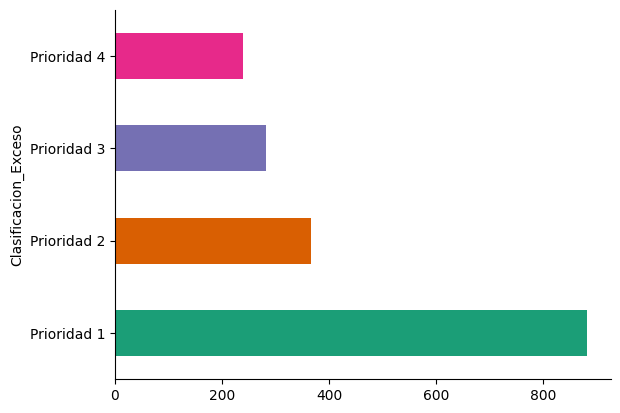

In [ ]:
# @title Clasificacion_Exceso

from matplotlib import pyplot as plt
import seaborn as sns
df_base_Excesos_C3.groupby('Clasificacion_Exceso').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


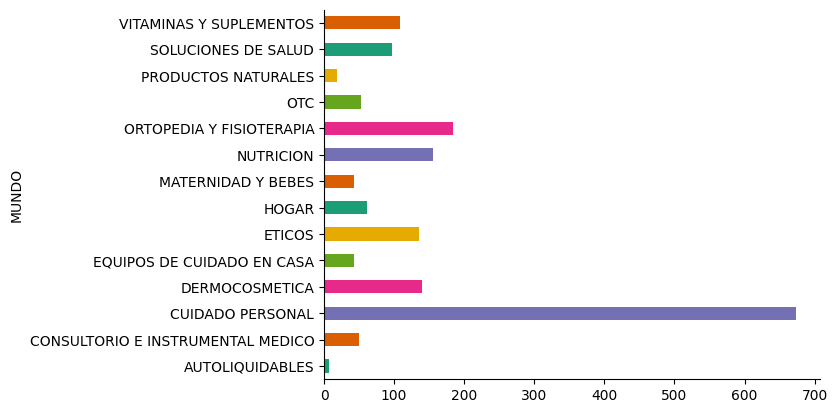

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_base_Excesos_C3.groupby('MUNDO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
"""Descarga de DataFrame con Resultados"""
df_base_Excesos_C3.to_excel("Excesos_Resultados.xlsx", index=False)
from google.colab import files
files.download("Excesos_Resultados.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""Estamación de compra"""

df_base_Necesidad_2= df_base_Necesidad.copy()
df_base_Necesidad_2= df_base_Necesidad_2.groupby("Material_x", as_index=False).sum()
df_base_Necesidad_2= df_base_Necesidad_2.drop(columns=['Centro_x','Almacen','Libre utilización','Stock máximo','Rotacion Mes','COSTO UND ','NOMBRE','NOMBRE PROVEEDOR','MUNDO'], axis=1)
display(df_base_Necesidad_2.head(2))

df_base_Excesos_2= df_base_Excesos_C3.copy()
df_base_Excesos_2= df_base_Excesos_2.drop(columns=['Centro_x','Libre utilización','Stock máximo','Rotacion Mes','NOMBRE','NOMBRE PROVEEDOR','MUNDO'], axis=1)
df_base_Excesos_2= df_base_Excesos_2.groupby("Material_x", as_index=False).sum()
display(df_base_Excesos_2.head(2))

,Material_x,Necesidad,Costo Necesidad
0,80450077,19.0,246620.0
1,80450084,6.0,43410.0


,Material_x,Centro_x,Libre utilización,Stock máximo,Rotacion Mes,NOMBRE,NOMBRE PROVEEDOR,COSTO UND,MUNDO,Excesos,Necesidad,Rank_Final,%_Acumulado,Clasificacion_Exceso
0,80450238,M301,14.0,10,3,GEL CICATRICURE CICATRICES/ESTRIAS X60G,HOME SUPPLIER SAS,24738,CUIDADO PERSONAL,4.0,36.0,388.0,4.841632,Prioridad 1
1,80450338,A301,10.0,8,2,DOLEX NINOS 7+ SUS.X120ML,IMPORBEBE S.A.S,12620,OTC,2.0,19.0,786.0,19.871295,Prioridad 1
